In [ ]:
pip install sklearn


In [ ]:
#importing libraries

import pandas as pd                     
import matplotlib.pyplot as plt        
from sklearn import tree
import numpy as np 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso 
from sklearn.ensemble import RandomForestRegressor  
from sklearn import svm   
from sklearn.tree import DecisionTreeRegressor   
from sklearn.neighbors import KNeighborsClassifier    
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [ ]:
#importing the dataset

data = pd.read_excel("path_to_dataset")

In [ ]:
#getting the information of data

print(data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [ ]:
#describing the dataset

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cid,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.401822e+05,3.673622e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
room_bed,21613.0,3.364503e+00,9.329861e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
room_bath,21613.0,2.057743e+00,6.818279e-01,0.000000e+00,1.500000e+00,2.250000e+00,2.500000e+00,3.500000e+00
living_measure,21613.0,2.079727e+03,9.181472e+02,2.900000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
lot_measure,21613.0,1.510458e+04,4.138335e+04,5.200000e+02,5.043000e+03,7.620000e+03,1.072300e+04,1.651359e+06
ceil,21613.0,1.492481e+00,5.397630e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
coast,21613.0,7.449220e-03,8.598879e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
sight,21613.0,2.337482e-01,7.655206e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.407718e+00,6.499332e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


**Preprocessing of data**

In [ ]:
#replacing special characters with NULL value

df = data.replace('[@_!#$%^&*()<>?/\|}{~:]',np.NaN, regex=True)
print("\n\n", df)



               cid         dayhours  ...  furnished  total_area
0      3876100940  20150427T000000  ...        0.0     12490.0
1      3145600250  20150317T000000  ...        0.0      3771.0
2      7129303070  20140820T000000  ...        0.0      5455.0
3      7338220280  20141010T000000  ...        0.0      5461.0
4      7950300670  20150218T000000  ...        0.0      5710.0
...           ...              ...  ...        ...         ...
21608   203600600  20150310T000000  ...        1.0     63597.0
21609   625049281  20140521T000000  ...        0.0      5871.0
21610   424069018  20140905T000000  ...        1.0     38122.0
21611  7258200055  20150206T000000  ...        0.0      9360.0
21612  8805900430  20141229T000000  ...        1.0      6815.0

[21613 rows x 23 columns]


In [ ]:
#datasplitting into numeric & object columns

object_columns_df = df.select_dtypes(include=['object'])
numerical_columns_df =df.select_dtypes(exclude=['object'])

In [ ]:
#Number of null values in object feature

null_counts = object_columns_df.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
dayhours    0
dtype: int64


In [ ]:
#list of numericl features

numerical_columns_df.dtypes

cid                   int64
price                 int64
room_bed            float64
room_bath           float64
living_measure      float64
lot_measure         float64
ceil                float64
coast               float64
sight               float64
condition           float64
quality             float64
ceil_measure        float64
basement            float64
yr_built            float64
yr_renovated          int64
zipcode               int64
lat                 float64
long                float64
living_measure15    float64
lot_measure15       float64
furnished           float64
total_area          float64
dtype: object

In [ ]:
#checking the number of null values in numerical features

null_counts = numerical_columns_df.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
cid                   0
price                 0
room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                 72
coast                31
sight                57
condition            85
quality               1
ceil_measure          1
basement              1
yr_built             15
yr_renovated          0
zipcode               0
lat                   0
long                 34
living_measure15    166
lot_measure15        29
furnished            29
total_area           68
dtype: int64


In [ ]:
#Filling NULL value by fillna_method

df['total_area']=df['total_area'].fillna(value=df['total_area'].mean(), inplace=False)
df['furnished']=df['furnished'].fillna(value=df['furnished'].mode()[0], inplace=False)
df['lot_measure15']=df['lot_measure15'].fillna(value=df['lot_measure15'].mean(), inplace=False)
df['living_measure15']=df['living_measure15'].fillna(value=df['living_measure15'].mean(), inplace=False)
df['ceil_measure']=df['ceil_measure'].fillna(value=df['ceil_measure'].mean(), inplace=False)
df['living_measure']=df['living_measure'].fillna(value=df['living_measure'].median(), inplace=False)
df['lot_measure']=df['lot_measure'].fillna(value=df['lot_measure'].mean(), inplace=False)
df['quality']=df['quality'].fillna(value=df['quality'].mean(), inplace=False)
df['basement']=df['basement'].fillna(value=df['basement'].mean(), inplace=False)
df['condition']=df['condition'].fillna(value=df['condition'].mode()[0], inplace=False)
df['ceil']=df['ceil'].fillna(value=df['ceil'].mode()[0], inplace=False)
df['coast']=df['coast'].fillna(value=df['coast'].mode()[0], inplace=False)
df['sight']=df['sight'].fillna(value=df['sight'].mode()[0], inplace=False)
df['long']=df['long'].fillna(value=None, method='ffill',inplace=False)
df['yr_built']=df['yr_built'].fillna(value=None, method='ffill',inplace=False)
df['room_bed']=df['room_bed'].fillna(value=2, method=None,inplace=False)
df['room_bath']=df['room_bath'].fillna(value=1, method=None,inplace=False)

Treatment of Outliars

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


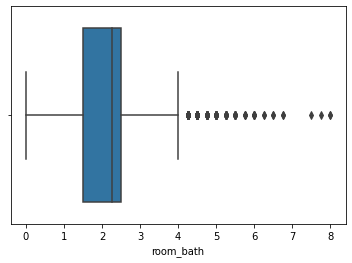

In [ ]:
#the boxplot of feature to get insight about outliar

sns.boxplot(df['room_bath'],data=df)

In [ ]:
#getting quartile of feature

print(df['room_bath'].quantile(0.50)) 
print(df['room_bath'].quantile(0.95)) 

2.25
3.5


In [ ]:
#replacement of outliars with median

df['room_bath'] = np.where(df['room_bath'] > 3.5, 2.25, df['room_bath'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


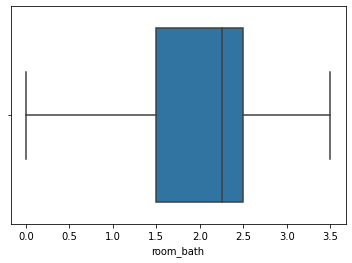

In [ ]:
#boxplot after removal of outliars

sns.boxplot(df['room_bath'],data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


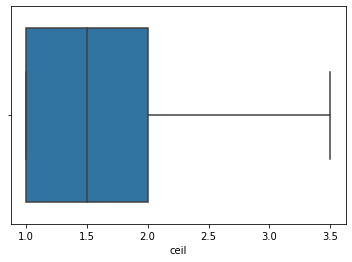

In [ ]:
#boxplot for outliar detection

sns.boxplot(df['ceil'],data=df)                   #no outliar is identified as shown by boxplot

Exploratory Data Analysis(EDA)

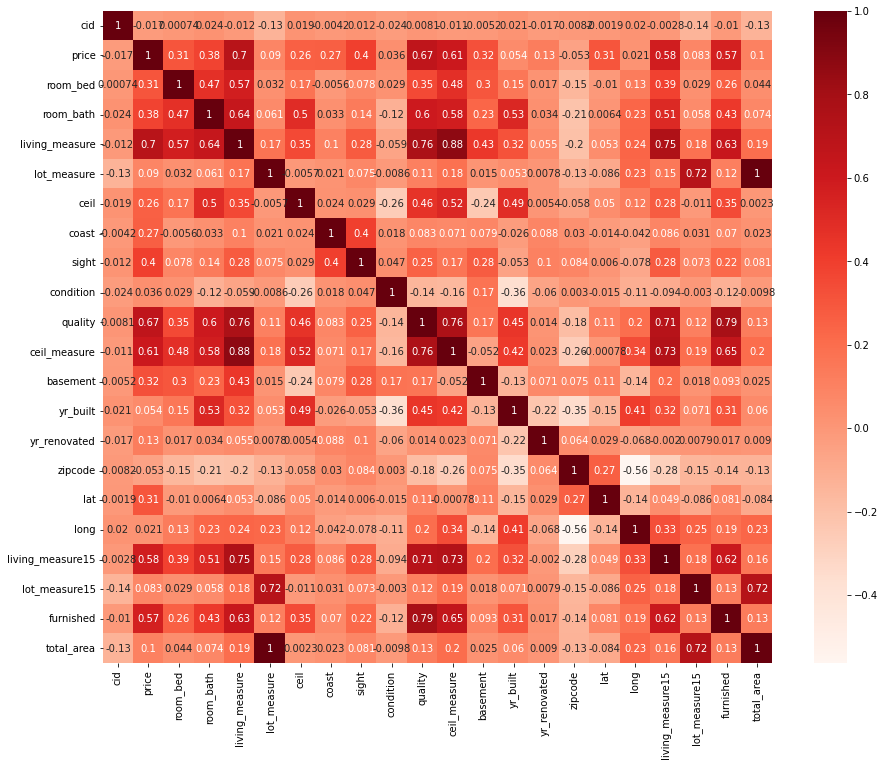

In [ ]:
#Using Pearson Correlation

plt.figure(figsize=(15,12))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#Transformation of Date

df['dayhours']= [x.strip().replace('T000000','') for x in df.dayhours]
df['dayhours'] = pd.to_datetime(df.dayhours)
df['year_sold'] = df.dayhours.dt.year
df_1 = df.drop(columns = 'dayhours')

In [ ]:
df_1[df_1['room_bed'] == 33].index
df_1['room_bed']=df_1['room_bed'].astype('category')
df_1.drop(columns = 'cid',inplace=True)
df_1.drop(index=750,inplace=True)
df_1 = df_1.reset_index()
df_1.drop(columns='index',inplace=True)

In [ ]:
df_1['room_bath']=df_1['room_bath'].astype('category')
df_1['ceil']=df_1['ceil'].astype('category')
df_1['coast']=df_1['coast'].astype('category')
df_1['sight']=df_1['sight'].astype('category')
df_1['condition']=df_1['condition'].astype('category')
df_1['quality']=df_1['quality'].astype('category')
df_1['have_basement'] = df_1['basement'].apply(lambda x: 0 if x==0 else 1)
df_1['Is_renovated'] = df_1['yr_renovated'].apply(lambda x: 0 if x==0 else 1)
df_1['Age_of_house'] = df_1['year_sold'] - df_1['yr_built']

In [ ]:
lst = []
for i in df_1.lat:
    if i<47.255900:
        lst.append('ES')
    elif i>47.255900 and i<47.405900:
        lst.append('MS')
    elif i>47.405900 and i<47.555900:
        lst.append('MN')
    else:
        lst.append('EN')
df_1['SN_region'] = lst
df_1['SN_region'] = df_1['SN_region'].astype('category')

In [ ]:
lst = []
for i in abs(df_1.long):
    if i<122.105000:
        lst.append('EE')
    elif i>122.105000 and i<122.205000:
        lst.append('ME')
    elif i>122.205000 and i<122.328000:
        lst.append('MW')
    else:
        lst.append('EW')
df_1['EW_region'] = lst
df_1['EW_region'] = df_1['EW_region'].astype('category')

In [ ]:
delete_index = df_1[df_1['Age_of_house']== -1]['year_sold'].index
df_1.drop(index=delete_index,inplace = True)

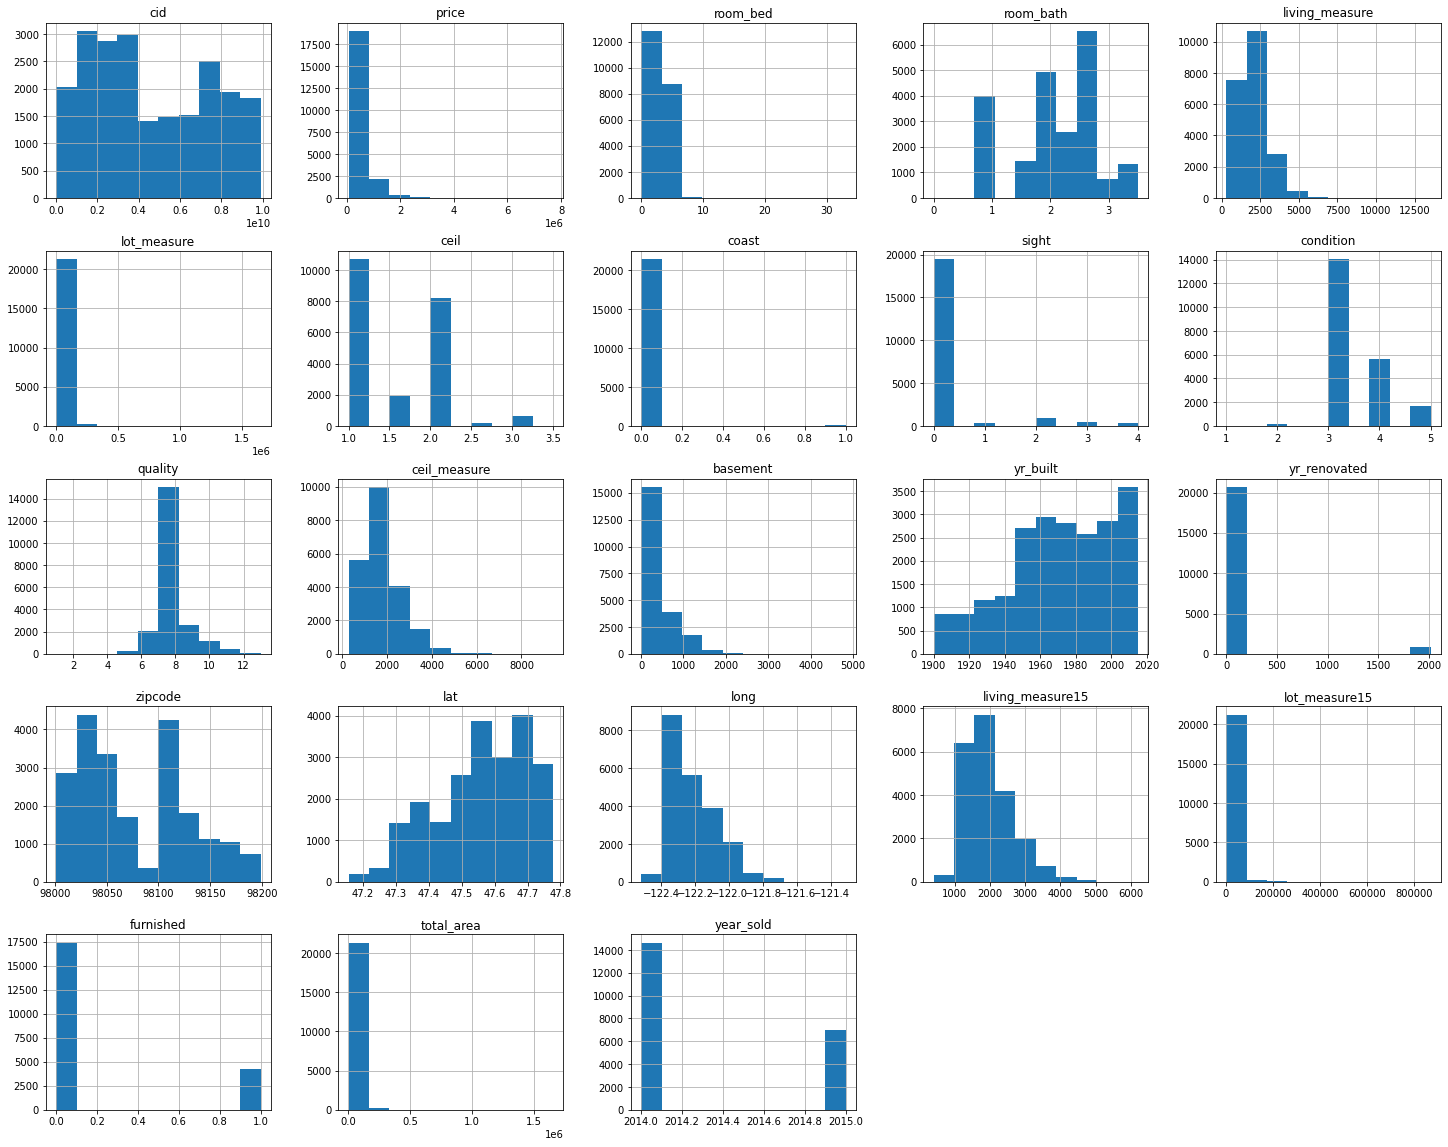

In [ ]:
#the distribution of each feature

df.hist(figsize=(25,20))
plt.show()

In [ ]:
#building of trends for features

list1 = ['dayhours','cid','price','long', 'lat',
        'year_sold', 'yr_built', 'sight', 'basement','yr_renovated',
        'furnished','zipcode','living_measure15','lot_measure15']
df_def = df.drop(columns=list1)
def trend():
    for i in df_def.columns:
        df[[i,'price']].groupby([i]).sum().plot(figsize=(15,5))
        plt.show()

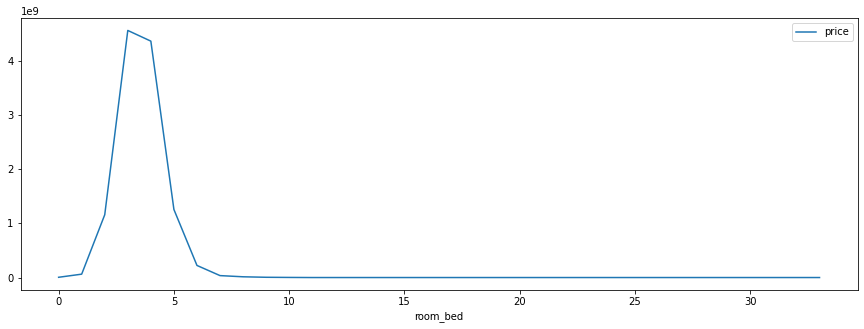

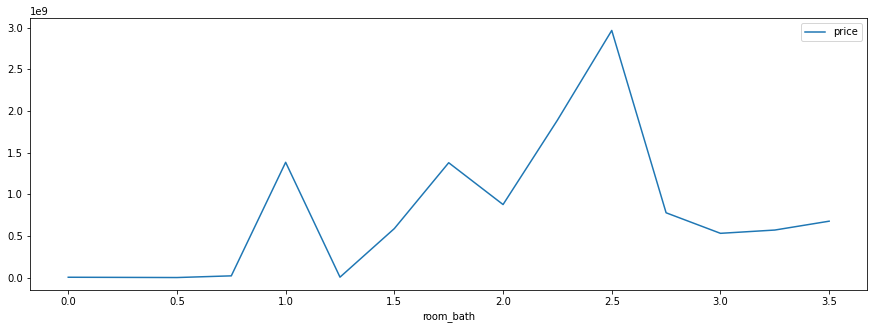

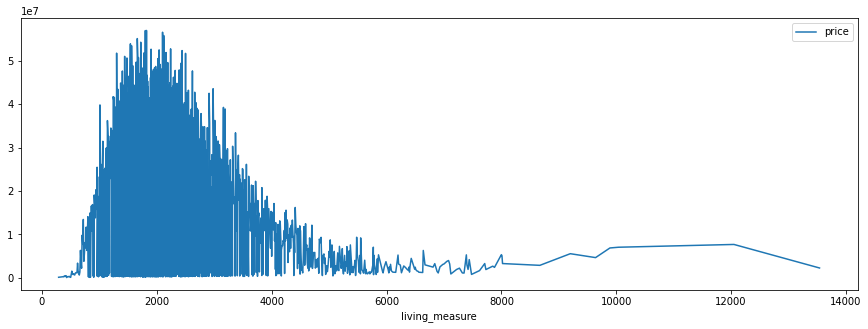

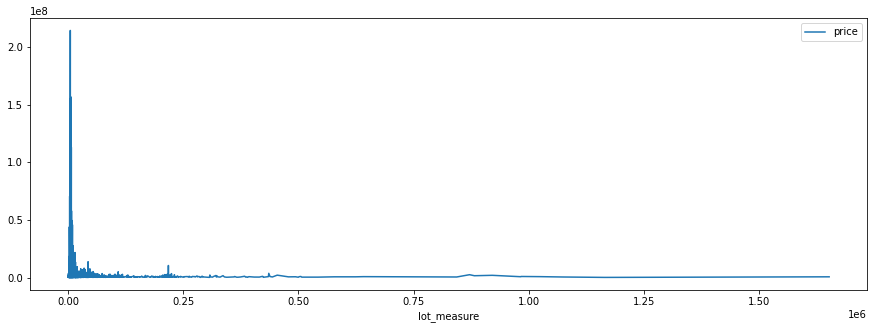

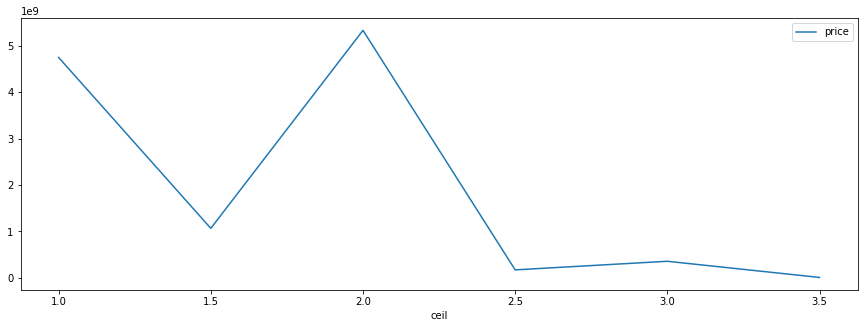

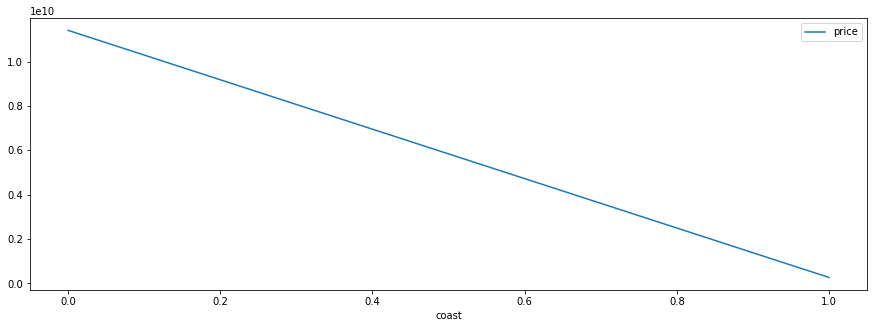

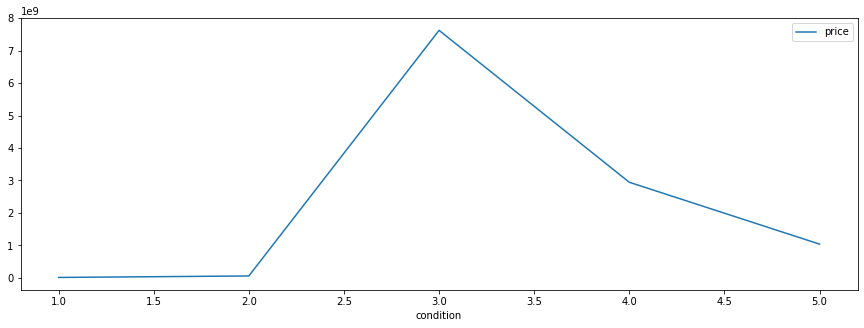

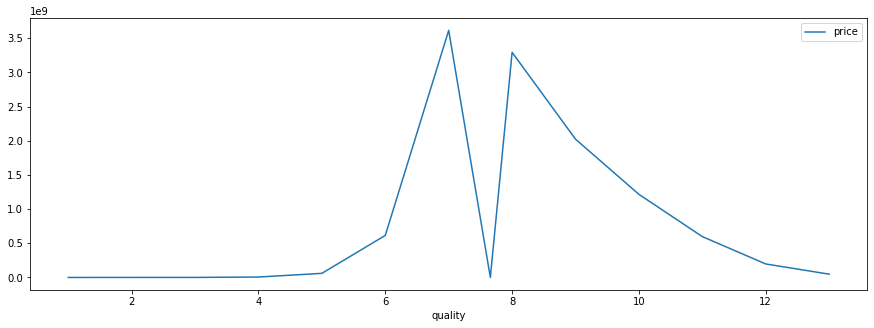

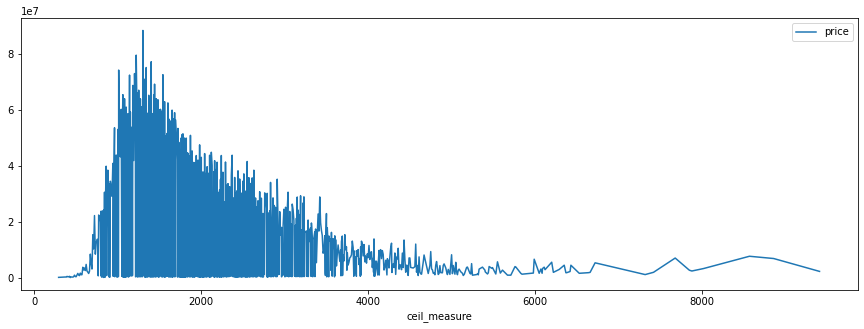

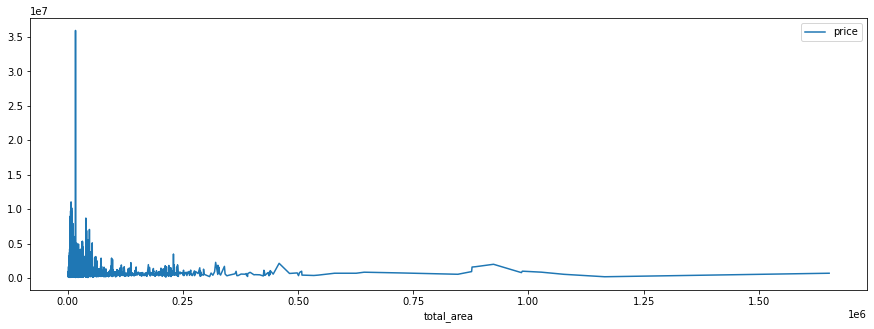

In [ ]:
trend() 

In [ ]:
#ploting of scatter plot

list1 = ['dayhours','cid','price','room_bed', 'room_bath',
        'ceil', 'coast', 'sight', 'condition', 'quality',
        'furnished','zipcode','year_sold','yr_renovated','lat','long','living_measure15','lot_measure15']
df_def = df.drop(columns=list1)
def scatterr():
    for i in df_def.columns:
        plt.figure(figsize=(15,5))
        sns.regplot(x='price',y=i, data=df, color='#79d13e')
        plt.show()

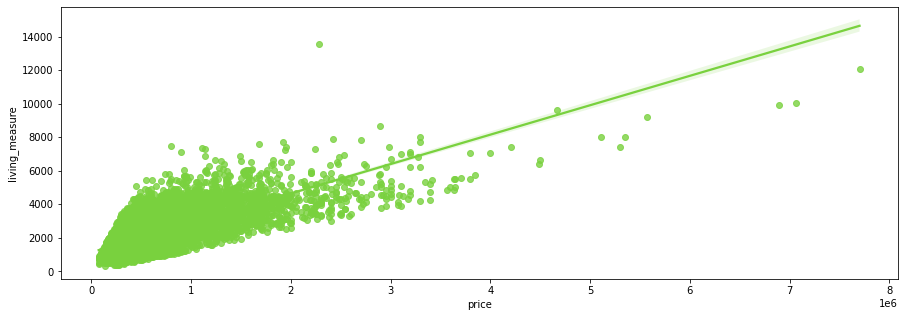

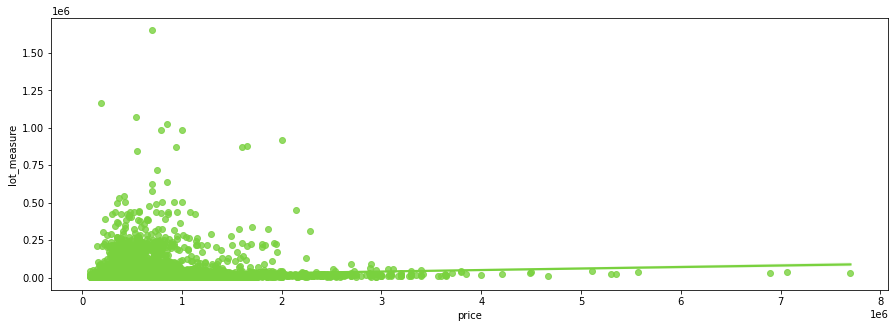

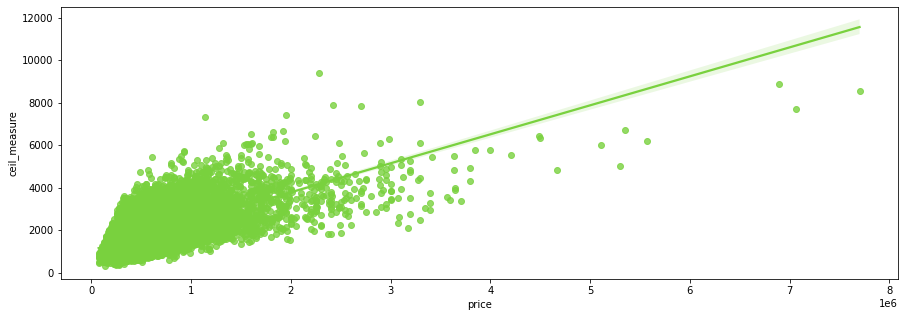

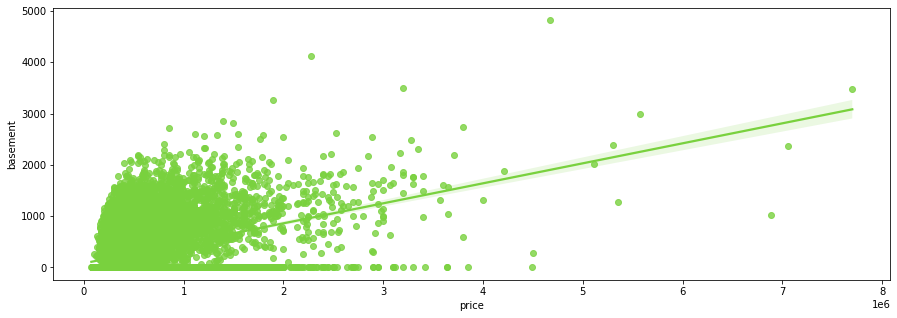

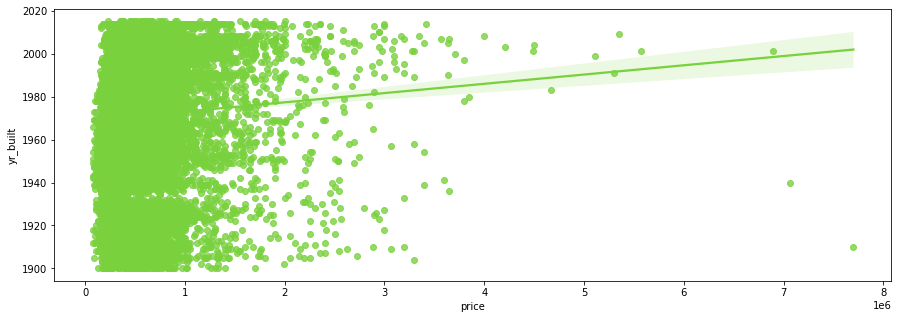

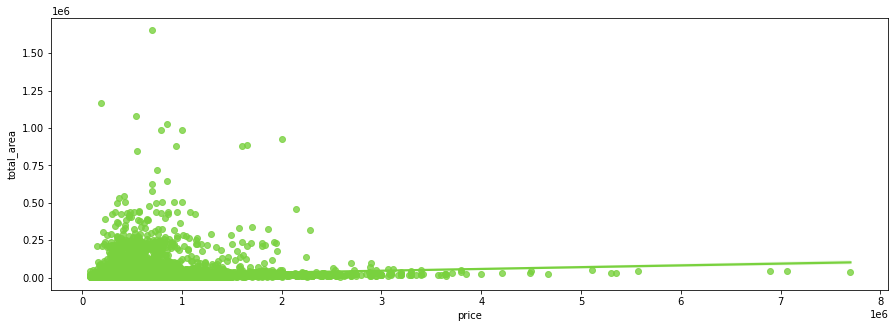

In [ ]:
scatterr()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

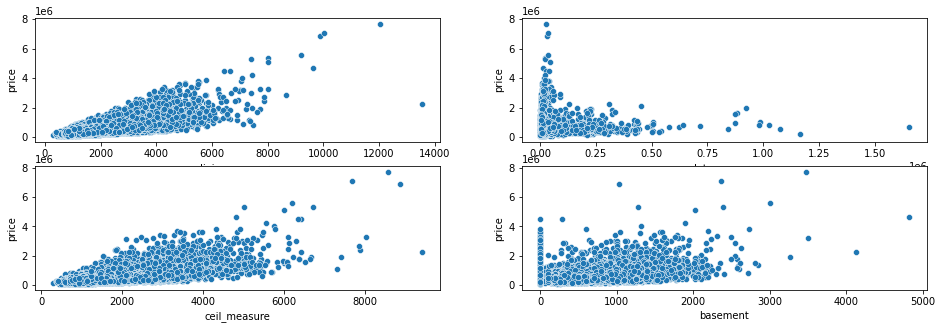

In [ ]:
#visualizing square footage of (home,lot,above and basement)

fig = plt.figure(figsize=(16,5))
fig.add_subplot(2,2,1)
sns.scatterplot(df['living_measure'], data['price'])
fig.add_subplot(2,2,2)
sns.scatterplot(df['lot_measure'],data['price'])
fig.add_subplot(2,2,3)
sns.scatterplot(df['ceil_measure'],data['price'])
fig.add_subplot(2,2,4)
sns.scatterplot(df['basement'],data['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


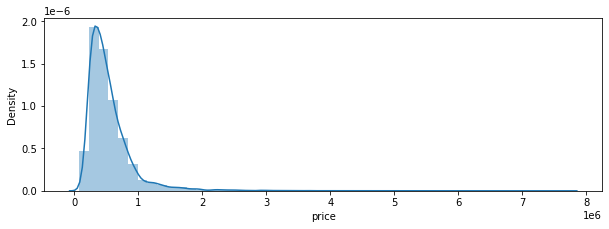

In [ ]:
#visualizing house prices

fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(df['price'])


Feature Selection for Modeling

In [ ]:
#Correlation with output variable

cor_target = abs(cor["price"])

#Selecting highly correlated features

selected_features = []
relevant_features = cor_target[cor_target>=0.2]
for i in relevant_features.keys():
  selected_features.append(i)
selected_features.remove('price')

In [ ]:
#checking preprocessed data for null values

final_df = df[relevant_features.keys()]

final_df.isnull().sum()

price               0
room_bed            0
room_bath           0
living_measure      0
ceil                0
coast               0
sight               0
quality             0
ceil_measure        0
basement            0
lat                 0
living_measure15    0
furnished           0
dtype: int64

In [ ]:
#datatype of each feature in data

display(final_df.dtypes)

price                 int64
room_bed            float64
room_bath           float64
living_measure      float64
ceil                float64
coast               float64
sight               float64
quality             float64
ceil_measure        float64
basement            float64
lat                 float64
living_measure15    float64
furnished           float64
dtype: object

In [ ]:
#conversion of datatype of features

final_df['room_bed'] = pd.to_numeric(final_df['room_bed'], errors = 'coerce')
final_df['room_bed'] = final_df['room_bed'].astype('int64')

final_df['room_bath'] = pd.to_numeric(final_df['room_bath'], errors = 'coerce')
final_df['room_bath'] = final_df['room_bath'].astype('int64')

final_df['living_measure'] = pd.to_numeric(final_df['living_measure'], errors = 'coerce')
final_df['living_measure'] = final_df['living_measure'].astype('int64')

final_df['ceil'] = pd.to_numeric(final_df['ceil'], errors = 'coerce')
final_df['ceil'] = final_df['ceil'].astype('int64')

final_df['sight'] = pd.to_numeric(final_df['sight'], errors = 'coerce')
final_df['sight'] = final_df['sight'].astype('int64')

final_df['coast'] = pd.to_numeric(final_df['coast'], errors = 'coerce')
final_df['coast'] = final_df['coast'].astype('int64')

final_df['quality'] = pd.to_numeric(final_df['quality'], errors = 'coerce')
final_df['quality'] = final_df['quality'].astype('int64')

final_df['ceil_measure'] = pd.to_numeric(final_df['ceil_measure'], errors = 'coerce')
final_df['ceil_measure'] = final_df['ceil_measure'].astype('int64')

final_df['basement'] = pd.to_numeric(final_df['basement'], errors = 'coerce')
final_df['basement'] = final_df['basement'].astype('int64')

final_df['lat'] = pd.to_numeric(final_df['lat'], errors = 'coerce')
final_df['lat'] = final_df['lat'].astype('int64')

final_df['living_measure15'] = pd.to_numeric(final_df['living_measure15'], errors = 'coerce')
final_df['living_measure15'] = final_df['living_measure15'].astype('int64')


final_df['furnished'] = pd.to_numeric(final_df['furnished'], errors = 'coerce')
final_df['furnished'] = final_df['furnished'].astype('int64')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
#display of datatype of each feature

display(final_df.dtypes)

price               int64
room_bed            int64
room_bath           int64
living_measure      int64
ceil                int64
coast               int64
sight               int64
quality             int64
ceil_measure        int64
basement            int64
lat                 int64
living_measure15    int64
furnished           int64
dtype: object

In [ ]:
#split dataset in features and target variable

Features = selected_features
X = final_df[Features] # Features
y = final_df.price # Target variable

In [ ]:
# split X and y into training and testing sets

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=25)

In [ ]:
#scaling of each feature

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#standardization scaler - fit&transform on train, fit only on test

s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

In [ ]:
#Optimal number of clusters for KNN

rmse_val = []                   #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)                    #fit the model
    pred=model.predict(X_test)                     #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred))  #calculate root mean square error(rmse)
    rmse_val.append(error)                         #store root mean square error(rmse) values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 290305.6334547238
RMSE value for k=  2 is: 254133.1714114181
RMSE value for k=  3 is: 238333.8224141512
RMSE value for k=  4 is: 227364.6129196551
RMSE value for k=  5 is: 223596.39059367112
RMSE value for k=  6 is: 224686.76213618222
RMSE value for k=  7 is: 224107.77694962514
RMSE value for k=  8 is: 225831.9899832484
RMSE value for k=  9 is: 226853.9614112045
RMSE value for k=  10 is: 227548.01125423462
RMSE value for k=  11 is: 225868.6571520682
RMSE value for k=  12 is: 224507.7394344825
RMSE value for k=  13 is: 223632.25262462
RMSE value for k=  14 is: 223220.70302224194
RMSE value for k=  15 is: 222628.1262754952
RMSE value for k=  16 is: 222558.9008256508
RMSE value for k=  17 is: 223322.6466075079
RMSE value for k=  18 is: 223328.19199506246
RMSE value for k=  19 is: 223206.29175272502
RMSE value for k=  20 is: 223074.15426435816


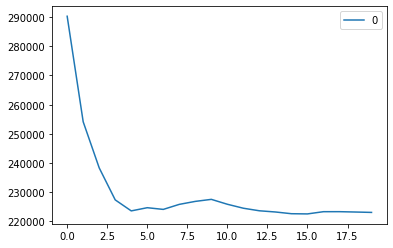

In [ ]:
#plotting the rmse values against k values(elbow curve)

curve = pd.DataFrame(rmse_val)                    
curve.plot()

 **Predictive Models**

In [ ]:
#1. KNN Model

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

acc_knn = metrics.explained_variance_score(y_test, knn_pred)
print('MAE:', metrics.mean_absolute_error(y_test, knn_pred))  
print('MSE:', metrics.mean_squared_error(y_test, knn_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,knn_pred))

MAE: 193302.45662734212
MSE: 95031029913.24821
RMSE: 308271.0332049513
VarScore: 0.4963401463507827


In [ ]:
# 2. OLS

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_pred = ols.predict(X_test)

acc_ols = metrics.explained_variance_score(y_test, ols_pred)
print('MAE:', metrics.mean_absolute_error(y_test, ols_pred))  
print('MSE:', metrics.mean_squared_error(y_test, ols_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ols_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,ols_pred))


MAE: 152905.7012860487
MSE: 55227508984.407936
RMSE: 235005.33820406705
VarScore: 0.5934669292623167


In [ ]:
# 3. Ridge

ridge = Ridge(alpha=0.5, fit_intercept=True,normalize=False, copy_X=True, max_iter=1000, tol=0.001, 
 solver='auto', random_state=None)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

acc_ridge = metrics.explained_variance_score(y_test, ridge_pred)
print('MAE:', metrics.mean_absolute_error(y_test, ridge_pred))  
print('MSE:', metrics.mean_squared_error(y_test, ridge_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,ridge_pred))

MAE: 152902.06345498952
MSE: 55227235844.275085
RMSE: 235004.75706733062
VarScore: 0.5934688878786207


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


In [ ]:
# 4. Lasso

lasso = Lasso(alpha=0.01, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, 
            tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

acc_lasso = metrics.explained_variance_score(y_test, lasso_pred)
print('MAE:', metrics.mean_absolute_error(y_test, lasso_pred))  
print('MSE:', metrics.mean_squared_error(y_test, lasso_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lasso_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,lasso_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


MAE: 152929.55687284714
MSE: 55231472098.18452
RMSE: 235013.77001823642
VarScore: 0.5934381130380986


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.617e+14, tolerance: 2.329e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
# 5. Random Forest

rf = RandomForestRegressor(max_depth=10,random_state=0,n_estimators=1000, n_jobs=-1)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

acc_rf = metrics.explained_variance_score(y_test, rf_pred)
print('MAE:', metrics.mean_absolute_error(y_test, rf_pred))  
print('MSE:', metrics.mean_squared_error(y_test, rf_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,rf_pred))

MAE: 138830.81935408642
MSE: 43585218420.4626
RMSE: 208770.7317141524
VarScore: 0.6791516761761502


In [ ]:
# 6. SVM Regression

reg = svm.SVR()
reg.fit(X_train, y_train)
reg_pred = reg.predict(X_test)

acc_reg = metrics.explained_variance_score(y_test, reg_pred)
print('MAE:', metrics.mean_absolute_error(y_test, reg_pred))  
print('MSE:', metrics.mean_squared_error(y_test, reg_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, reg_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,reg_pred))

MAE: 218103.58525579365
MSE: 142487109169.106
RMSE: 377474.6470547472
VarScore: 0.003533602746633724


In [ ]:
# 7. Decision Tree

DT = DecisionTreeRegressor(max_depth = 5)
DT.fit(X_train, y_train)
DT_pred = reg.predict(X_test)

acc_DT = metrics.explained_variance_score(y_test, DT_pred)
print('MAE:', metrics.mean_absolute_error(y_test, DT_pred))  
print('MSE:', metrics.mean_squared_error(y_test, DT_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, DT_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,DT_pred))

MAE: 218103.58525579365
MSE: 142487109169.106
RMSE: 377474.6470547472
VarScore: 0.003533602746633724


In [ ]:
#building the neural network model

nn_model = Sequential()

nn_model.add(Dense(50, activation='relu'))
nn_model.add(Dense(100, activation='relu'))
nn_model.add(Dense(50, activation='relu'))
nn_model.add(Dense(1))

nn_model.compile(loss='mean_squared_error', optimizer='adam')


In [ ]:
#training the neural network model

hist=nn_model.fit(x=X_train,y=y_train,
          batch_size=40,epochs=400,
    shuffle=True,
    verbose=2
)
nn_model.summary()

Epoch 1/400
433/433 - 1s - loss: 371826425856.0000 - 1s/epoch - 3ms/step
Epoch 2/400
433/433 - 1s - loss: 97286971392.0000 - 656ms/epoch - 2ms/step
Epoch 3/400
433/433 - 1s - loss: 70757261312.0000 - 648ms/epoch - 1ms/step
Epoch 4/400
433/433 - 1s - loss: 61983059968.0000 - 665ms/epoch - 2ms/step
Epoch 5/400
433/433 - 1s - loss: 57279389696.0000 - 635ms/epoch - 1ms/step
Epoch 6/400
433/433 - 1s - loss: 54649806848.0000 - 626ms/epoch - 1ms/step
Epoch 7/400
433/433 - 1s - loss: 52983238656.0000 - 651ms/epoch - 2ms/step
Epoch 8/400
433/433 - 1s - loss: 51815297024.0000 - 641ms/epoch - 1ms/step
Epoch 9/400
433/433 - 1s - loss: 50927312896.0000 - 616ms/epoch - 1ms/step
Epoch 10/400
433/433 - 1s - loss: 50465259520.0000 - 629ms/epoch - 1ms/step
Epoch 11/400
433/433 - 1s - loss: 49979056128.0000 - 621ms/epoch - 1ms/step
Epoch 12/400
433/433 - 1s - loss: 49654013952.0000 - 635ms/epoch - 1ms/step
Epoch 13/400
433/433 - 1s - loss: 49446342656.0000 - 631ms/epoch - 1ms/step
Epoch 14/400
433/433 - 

In [ ]:
#prediction of neural network model on test dataset

nn_pred = nn_model.predict(X_test)

acc_nn = metrics.explained_variance_score(y_test, nn_pred)
print('MAE:', metrics.mean_absolute_error(y_test, nn_pred))  
print('MSE:', metrics.mean_squared_error(y_test, nn_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, nn_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,nn_pred))

MAE: 141232.74922290654
MSE: 43554727978.07759
RMSE: 208697.69519110073
VarScore: 0.6796455815204655


In [ ]:
#comparison of models for variance score

models = pd.DataFrame({
    'Model': ['knn','Linear Regression', 'Ridge','Lasso','Random Forest', 'Support Vector Machines','Decision Tree', 'Neural Network'],
    'VarScore': [acc_knn*100,acc_ols*100, acc_ridge*100, acc_lasso*100,acc_rf*100,acc_reg*100, acc_DT*100, acc_nn*100]})
models.sort_values(by='VarScore', ascending=False)

,Model,VarScore
7,Neural Network,67.964558
4,Random Forest,67.915168
2,Ridge,59.346889
1,Linear Regression,59.346693
3,Lasso,59.343811
0,knn,49.634015
5,Support Vector Machines,0.353360
6,Decision Tree,0.353360


In [ ]:
# XGBoost Regressor

from xgboost import XGBRegressor
xgboost = XGBRegressor(learning_rate=0.01,
                                            n_estimators=6000,
                                            max_depth=4,
                                            min_child_weight=0,
                                            gamma=0.6,
                                            subsample=0.7,
                                            colsample_bytree=0.7,
                                            objective='reg:linear',
                                            nthread=-1,
                                            scale_pos_weight=1,
                                            seed=27,
                                            reg_alpha=0.00006,
                                            random_state=42,
                      n_jobs=-1)

xgboost.fit(X_train,y_train)
xgboost_pred = xgboost.predict(X_test)

acc_xgboost = metrics.explained_variance_score(y_test, xgboost_pred)
print('MAE:', metrics.mean_absolute_error(y_test, xgboost_pred))  
print('MSE:', metrics.mean_squared_error(y_test, xgboost_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgboost_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,xgboost_pred))

[10:35:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 139506.30912777584
MSE: 45595878635.291794
RMSE: 213531.91479329686
VarScore: 0.6643825285323427


In [ ]:
#Bagging Regressor

from sklearn.ensemble import BaggingRegressor
br_model = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))
br_model.fit(X_train, y_train)
br_pred = br_model.predict(X_test)


acc_br = metrics.explained_variance_score(y_test, xgboost_pred)
print('MAE:', metrics.mean_absolute_error(y_test, xgboost_pred))  
print('MSE:', metrics.mean_squared_error(y_test, xgboost_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgboost_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,xgboost_pred))

MAE: 139506.30912777584
MSE: 45595878635.291794
RMSE: 213531.91479329686
VarScore: 0.6643825285323427


In [ ]:
#ensembling method for prediction

ensemble_pred = (lasso_pred + rf_pred +  ridge_pred +
           ols_pred )/4

acc_ensemble = metrics.explained_variance_score(y_test, ensemble_pred)
print('MAE:', metrics.mean_absolute_error(y_test, ensemble_pred))  
print('MSE:', metrics.mean_squared_error(y_test, ensemble_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ensemble_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,ensemble_pred))

MAE: 146075.00372932982
MSE: 49922640548.83951
RMSE: 223433.74979809902
VarScore: 0.632511311077798


In [ ]:
#comparison of models for variance score

models = pd.DataFrame({
    'Model': ['knn','Linear Regression', 'Ridge','Lasso','Random Forest', 'Support Vector Machines','Decision Tree', 'Neaural Network', 'XgBoost','BaggingRegressor','Ensemble Model'],
    'VarScore': [acc_knn*100,acc_ols*100, acc_ridge*100, acc_lasso*100,acc_rf*100,acc_reg*100, acc_DT*100, acc_nn*100, acc_xgboost*100, acc_br*100, acc_ensemble*100]})
models.sort_values(by='VarScore', ascending=False)

,Model,VarScore
7,Neaural Network,67.964558
4,Random Forest,67.915168
8,XgBoost,66.438253
9,BaggingRegressor,66.438253
10,Ensemble Model,63.251131
2,Ridge,59.346889
1,Linear Regression,59.346693
3,Lasso,59.343811
0,knn,49.634015
5,Support Vector Machines,0.353360


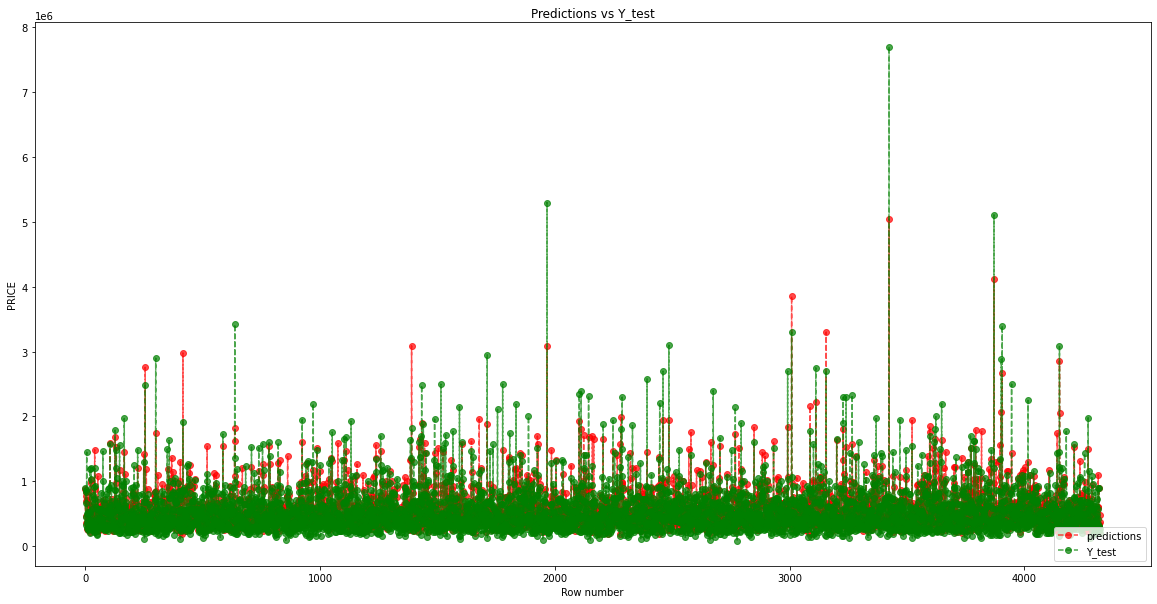

In [ ]:
# plot between predictions and Y_test

x_axis = np.array(range(0, nn_pred.shape[0]))
plt.figure(figsize=(20,10))
plt.plot(x_axis, rf_pred, linestyle="--", marker="o", alpha=0.7, color='r', label="predictions")
plt.plot(x_axis, y_test, linestyle="--", marker="o", alpha=0.7, color='g', label="Y_test")
plt.xlabel('Row number')
plt.ylabel('PRICE')
plt.title('Predictions vs Y_test')
plt.legend(loc='lower right')

Text(0.5, 1.0, 'Variable Importance')

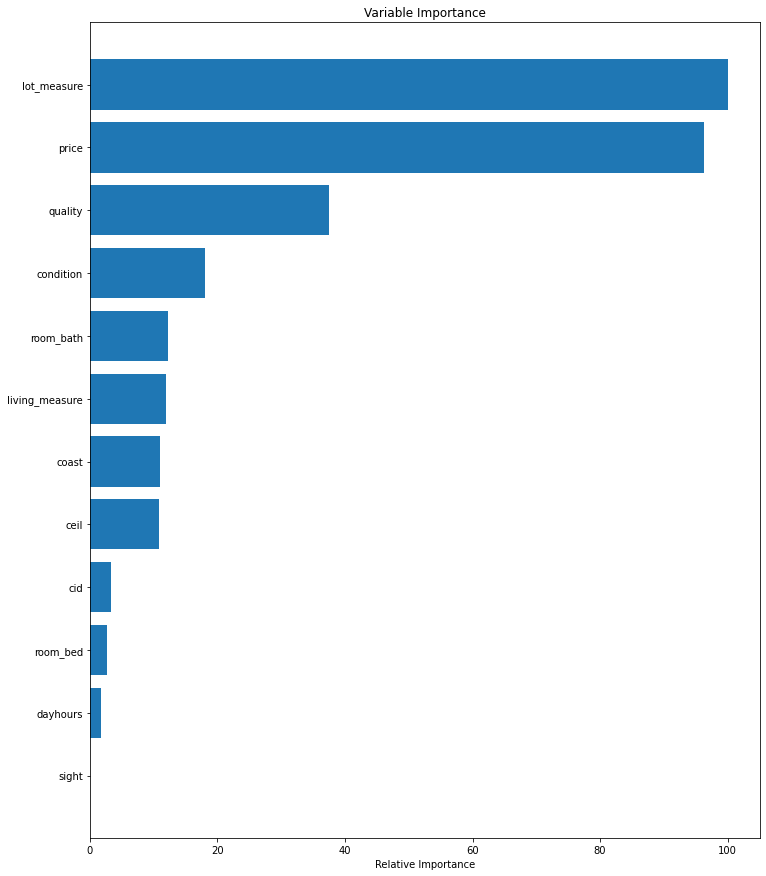

In [ ]:
#plottinf for the importance of features

feature_importance = rf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)
pos        = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize = (12,15))

#Make a horizontal bar plot.

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

In [ ]:
#regularization 

from keras.layers import Dropout
from keras import regularizers

In [ ]:
#model building 

model_3 = Sequential([
                       

    Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    
    Dropout(0.3),
    Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, kernel_regularizer=regularizers.l2(0.01)),
])

 

In [ ]:
#compiling the parameters  of model

model_3.compile(optimizer='adam',
              loss='mean_squared_error')

In [ ]:
#fitting the model on training dataset

hist_3 = model_3.fit(x=X_train,y=y_train,
          batch_size=32,epochs=100,
    shuffle=True,
    verbose=2)

model_3.summary()

Epoch 1/100
541/541 - 2s - loss: 340673429504.0000 - 2s/epoch - 3ms/step
Epoch 2/100
541/541 - 1s - loss: 95270764544.0000 - 855ms/epoch - 2ms/step
Epoch 3/100
541/541 - 1s - loss: 79841959936.0000 - 855ms/epoch - 2ms/step
Epoch 4/100
541/541 - 1s - loss: 71617167360.0000 - 856ms/epoch - 2ms/step
Epoch 5/100
541/541 - 1s - loss: 68594753536.0000 - 837ms/epoch - 2ms/step
Epoch 6/100
541/541 - 1s - loss: 66302300160.0000 - 844ms/epoch - 2ms/step
Epoch 7/100
541/541 - 1s - loss: 67073908736.0000 - 876ms/epoch - 2ms/step
Epoch 8/100
541/541 - 1s - loss: 63894437888.0000 - 852ms/epoch - 2ms/step
Epoch 9/100
541/541 - 1s - loss: 63841275904.0000 - 849ms/epoch - 2ms/step
Epoch 10/100
541/541 - 1s - loss: 61845409792.0000 - 837ms/epoch - 2ms/step
Epoch 11/100
541/541 - 1s - loss: 64598065152.0000 - 873ms/epoch - 2ms/step
Epoch 12/100
541/541 - 1s - loss: 64257564672.0000 - 852ms/epoch - 2ms/step
Epoch 13/100
541/541 - 1s - loss: 62756298752.0000 - 849ms/epoch - 2ms/step
Epoch 14/100
541/541 - 

In [ ]:
#prediction on test dataset

model_3_pred = model_3.predict(X_test)

acc_nn = metrics.explained_variance_score(y_test, model_3_pred)
print('MAE:', metrics.mean_absolute_error(y_test, model_3_pred))  
print('MSE:', metrics.mean_squared_error(y_test, model_3_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, model_3_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,model_3_pred))

MAE: 141665.58775734444
MSE: 47614404838.22509
RMSE: 218207.25202940687
VarScore: 0.6522733978206717
